In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.optimize import fsolve
from py_vollib_vectorized.models import vectorized_black_scholes
from py_vollib_vectorized.api import get_all_greeks
from py_vollib_vectorized.implied_volatility import vectorized_implied_volatility
from py_vollib_vectorized.api import price_dataframe
from statsmodels.tsa.stattools import adfuller

import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, q_stat, adfuller
from scipy.stats import probplot, moment

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

In [27]:
def plot_correlogram(x, lags=None, title=None):
    lags = min(10, int(len(x)/5)) if lags is None else lags
    with sns.axes_style('whitegrid'):
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
        x.plot(ax=axes[0][0], title='Residuals')
        x.rolling(21).mean().plot(ax=axes[0][0], c='k', lw=1)
        q_p = np.max(q_stat(acf(x, nlags=lags), len(x))[1])
        stats = f'Q-Stat: {np.max(q_p):>8.2f}\nADF: {adfuller(x)[1]:>11.2f}'
        axes[0][0].text(x=.02, y=.85, s=stats, transform=axes[0][0].transAxes)
        probplot(x, plot=axes[0][1])
        mean, var, skew, kurtosis = moment(x, moment=[1, 2, 3, 4])
        s = f'Mean: {mean:>12.2f}\nSD: {np.sqrt(var):>16.2f}\nSkew: {skew:12.2f}\nKurtosis:{kurtosis:9.2f}'
        axes[0][1].text(x=.02, y=.75, s=s, transform=axes[0][1].transAxes)
        plot_acf(x=x, lags=lags, zero=False, ax=axes[1][0])
        plot_pacf(x, lags=lags, zero=False, ax=axes[1][1])
        axes[1][0].set_xlabel('Lag')
        axes[1][1].set_xlabel('Lag')
        fig.suptitle(title, fontsize=14)
        sns.despine()
        fig.tight_layout()
        fig.subplots_adjust(top=.9)

In [28]:
price = [35.745284543259416, 34.644352216750285]
S = 100.36100973076621
K = [65, 135]
t = 11/600
r = 0
flag = ['c', 'p']
vectorized_implied_volatility(price, S, K, t, r, flag, q=0, return_as='numpy')

array([1.89606749, 0.74278823])

In [29]:
S = 100
K = [65,135]
t = 1/3600
r = 0
flag = ['c', 'p']
sigma = [6.40976207, 2.65251273]
get_all_greeks(flag, S, K, t, r, sigma, model='black_scholes', return_as='dict')

{'delta': [0.9999780424248428, -0.9999999999941167],
 'gamma': [8.853575650391576e-06, 0.0],
 'theta': [-5.3204201726941847e-05, -4.121147867408581e-12],
 'rho': [0.00018054930845323724, -0.00037499999999823785],
 'vega': [1.5765114511623324e-06, 7.638334409421077e-13]}

In [30]:
S = 100.36100973076621
K = [65,135]
t = 11/600
r = 0
flag = ['c', 'p']
sigma = [1.89606749, 0.74278823]
get_all_greeks(flag, S, K, t, r, sigma, model='black_scholes', return_as='dict')

{'delta': [0.9656486632678707, -0.998121051812717],
 'gamma': [0.0029532449730140797, 0.000593498867829112],
 'theta': [-0.13552789671889087, -0.0033384190059848606],
 'rho': [0.011214168118559797, -0.02471641130001956],
 'vega': [0.010340075839657459, 0.0008152744968121794]}

In [31]:
df = pd.DataFrame()

df['Flag'] = ['c', 'p','c','p']

df['S'] = 100

df['K'] = [65, 135,65,135]

df['T'] = 1/600

df['R'] = 0

df['IV'] = [6.40976207, 2.65251273,6.40976207, 2.65251273]
df

# price_dataframe(df, flag_col='Flag', underlying_price_col='S', strike_col='K', annualized_tte_col='T', riskfree_rate_col='R', sigma_col='IV', model='black_scholes', inplace=False)

,Flag,S,K,T,R,IV
0,c,100,65,0.001667,0,6.409762
1,p,100,135,0.001667,0,2.652513
2,c,100,65,0.001667,0,6.409762
3,p,100,135,0.001667,0,2.652513


In [32]:
df = pd.read_csv("../data/training_pricepaths.csv", index_col=0)
df.head()

,underlying,call65,call70,call75,call80,call85,call90,call95,call100,call105,...,put90,put95,put100,put105,put110,put115,put120,put125,put130,put135
0,100.000000,35.436537,30.436449,25.465460,20.544501,15.718957,11.091298,6.883928,3.493461,1.333979,...,1.091298,1.883928,3.493461,6.333979,10.375479,15.090290,20.025352,25.011182,30.008593,35.010526
1,99.703351,35.117638,30.116325,25.143759,20.221087,15.395046,10.773197,6.591873,3.268877,1.212482,...,1.069846,1.888522,3.565526,6.509131,10.632709,15.380026,20.322307,25.309459,30.307651,35.311125
2,99.781739,35.246585,30.252950,25.291467,20.385660,15.585513,11.000335,6.856841,3.536347,1.409663,...,1.218595,2.075101,3.754608,6.627924,10.649909,15.334966,20.254847,25.235405,30.231430,35.233703
3,99.989922,35.412877,30.423416,25.464844,20.560375,15.759372,11.169538,7.013417,3.664809,1.492569,...,1.179616,2.023495,3.674888,6.502648,10.479730,15.139596,20.050467,25.028339,30.023364,35.024824
4,99.348765,34.765348,29.783212,24.834189,19.944124,15.167839,10.623611,6.550014,3.329964,1.305116,...,1.274847,2.201250,3.981199,6.956351,11.042635,15.753561,20.681516,25.664342,30.660513,35.661443


<Axes: >

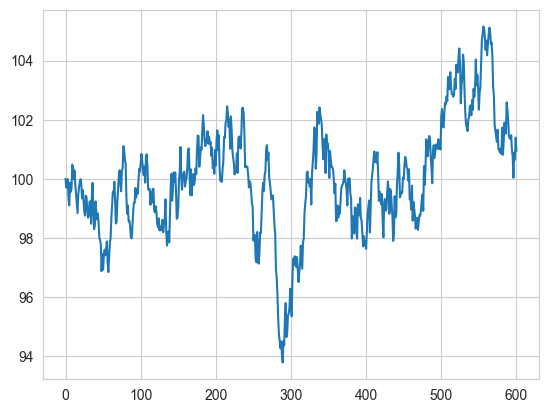

In [33]:
df['underlying'].plot()

<Axes: >

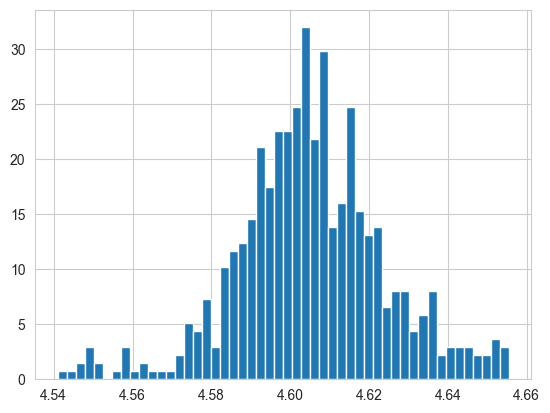

In [34]:
np.log(df['underlying']).hist(bins=50,density=True)

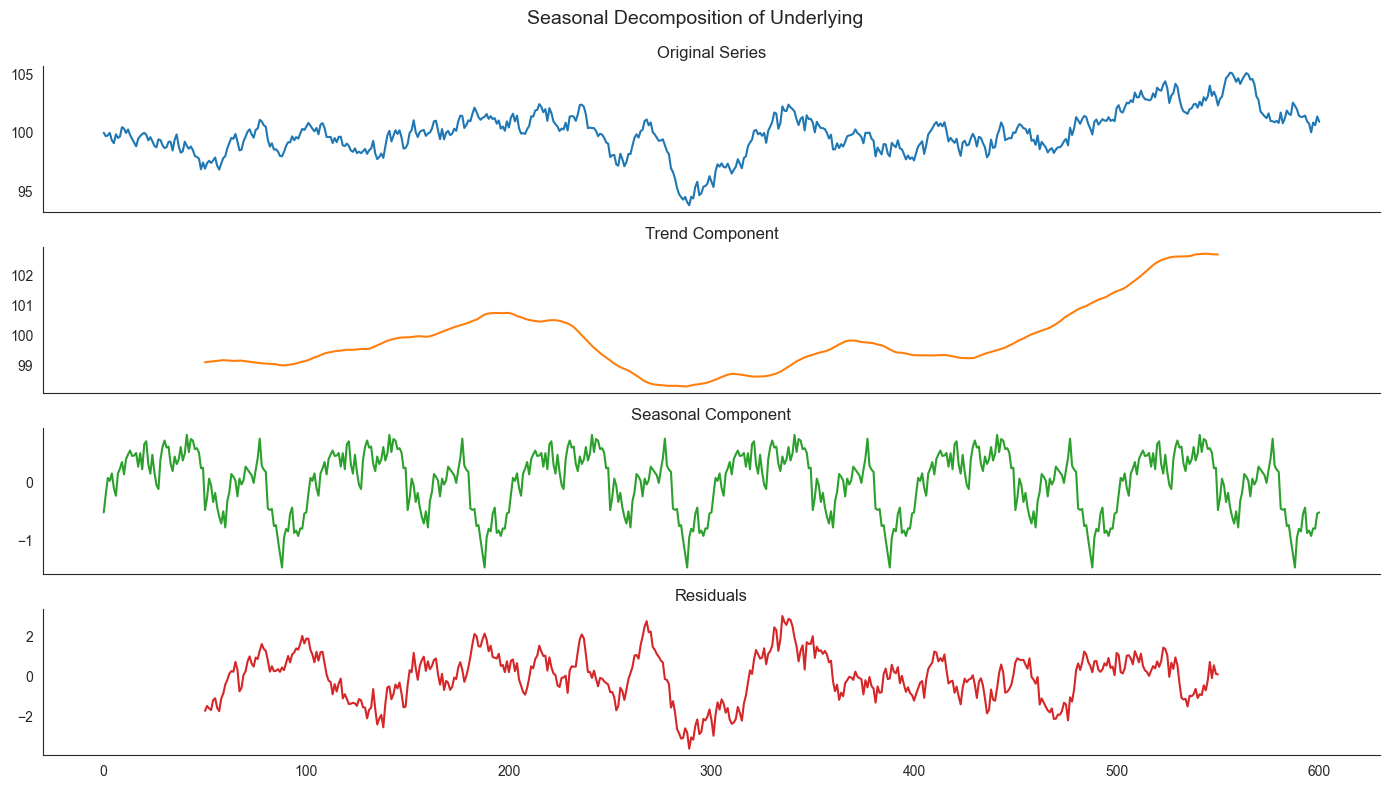

In [35]:
df_underlying = df[['underlying']]
components_underlying = tsa.seasonal_decompose(df_underlying['underlying'], model='additive', period=100)
ts_pearls = (df_underlying['underlying'].to_frame('Original')
      .assign(Trend=components_underlying.trend)
      .assign(Seasonality=components_underlying.seasonal)
      .assign(Residual=components_underlying.resid))
with sns.axes_style('white'):
    ts_pearls.plot(subplots=True, figsize=(14, 8), title=['Original Series', 'Trend Component', 'Seasonal Component','Residuals'], legend=False)
    plt.suptitle('Seasonal Decomposition of Underlying', fontsize=14)
    sns.despine()
    plt.tight_layout()
    plt.subplots_adjust(top=.91);

In [36]:
pd.DataFrame(components_underlying.seasonal).idxmin()

seasonal    88
dtype: int64

c:\Users\redce\Documents\cs-stuff\uchicago-trading-2023\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


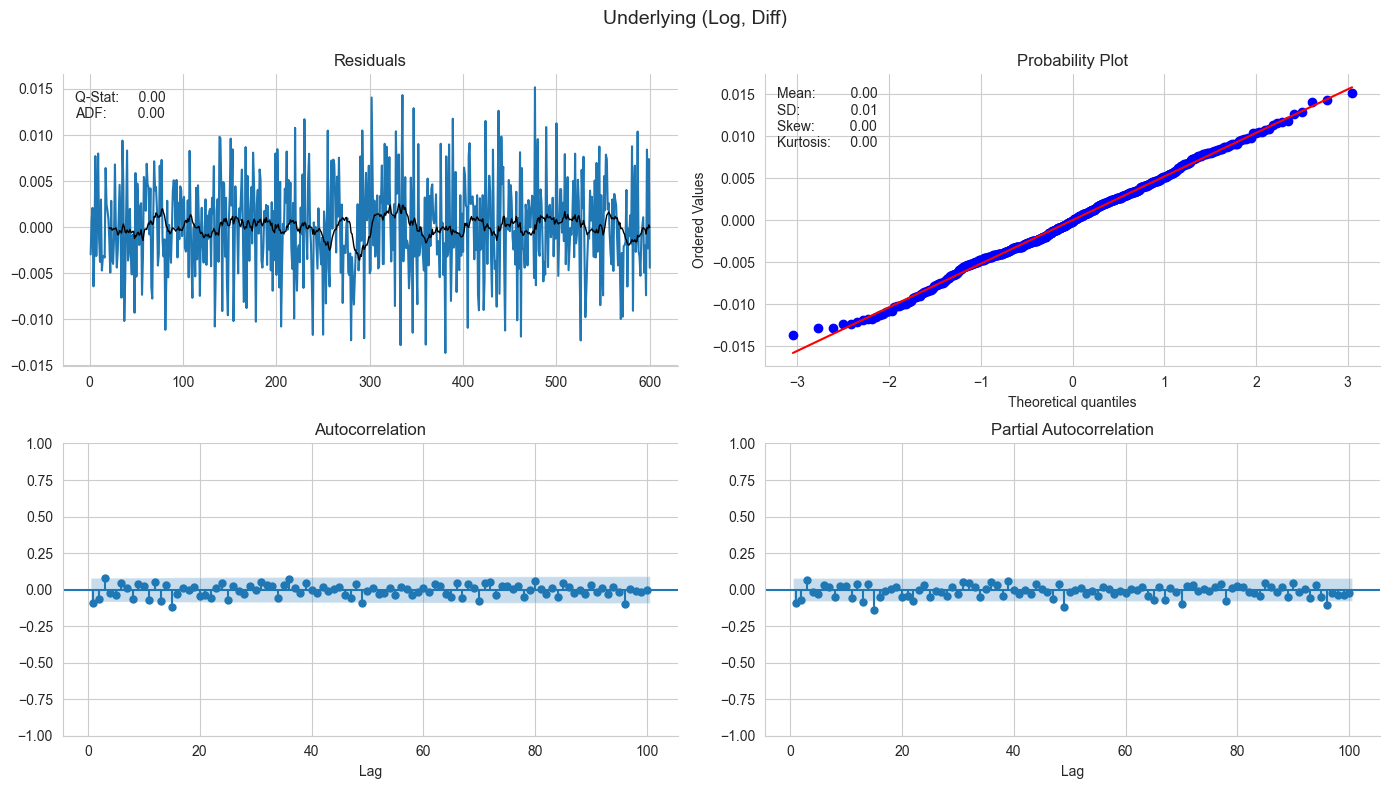

In [37]:
underlying_log = np.log(df_underlying['underlying'])
underlying_log_diff = underlying_log.diff().dropna()

# plot_correlogram(df_underlying['underlying'], lags=100, title='Underlying (Log, Diff)')
plot_correlogram(underlying_log_diff, lags=100, title='Underlying (Log, Diff)')

In [38]:
res = adfuller(df_underlying['underlying'])
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -3.055788
p-value: 0.030003
critical values at different levels:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [39]:
# size = (5,4)
# for i in df.columns:
#     # df[[i]].plot(figsize=size)
#     df[[i]].hist(figsize=size, bins=50)

In [40]:
df_call65 = df[['underlying','call65']]
for i in df_call65['call65']:
    print(i)

35.43653723282135
35.11763783785998
35.246584651848835
35.412876729113336
34.76534804384299
34.531606265835926
35.31363061193635
34.98076011678951
35.08474764511553
35.860100840209235
35.745284543259416
35.401371240453884
35.753061036150285
35.30825907600266
34.91276361871722
34.58202256887078
34.25140548878111
34.89220827148672
35.13816935751132
35.38326480521962
35.423613507903326
35.25786751900871
34.76534037980401
35.056235241175735
34.69408752736711
34.31085294920164
34.15489537464858
34.79218303350569
34.74404984122795
34.332683163125225
34.07051507748286
34.10320921797459
34.621632163358406
34.64284945604607
33.909251436838474
34.876484016412164
35.33424490179349
34.26855414030369
33.68113156794312
33.84948001570006
34.7402115357792
34.35373796437894
34.06391079519335
34.32288228359596
33.96500195652582
33.476942009605594
33.40824023042951
33.20869229413344
32.284174335041854
32.870743614960205
32.39107363281419
32.81308477182064
33.02960024207158
32.82967550512816
32.9958131392

In [44]:
def norm_cdf(x):
    return norm.cdf(x)
def norm_pdf(x):
    return norm.pdf(x)

# Define the Black-Scholes function
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    Nd1 = norm_cdf(d1)
    Nd2 = norm_cdf(d2)
    return S*Nd1 - K*np.exp(-r*T)*Nd2

# Define the derivative of the Black-Scholes function with respect to sigma
def d_black_scholes_call_d_sigma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    return S*np.sqrt(T)*norm_pdf(d1)

# Define the Newton-Raphson method for solving for the implied volatility
def implied_volatility(S, K, T, r, C, sigma_0, epsilon=1e-6, max_iterations=100):
    sigma = sigma_0
    for i in range(max_iterations):
        f = black_scholes_call(S, K, T, r, sigma) - C
        df = d_black_scholes_call_d_sigma(S, K, T, r, sigma)
        sigma -= f / df
        if abs(f) < epsilon:
            return sigma
    return np.nan

# Calculate the implied volatility for each option

# TODO: Add column for time until expiry starting from 0.25 to 0.08333... decreasing by 1/600 each time
df_call65['implied_volatility'] = df_call65.apply(lambda row: implied_volatility(row['underlying'], 65, row['time_to_expiry'], 0.05, row['call65'], 0.3), axis=1)

# Create a 3D surface plot of the implied volatility surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(df_call65['time_to_expiry'], df_call65['underlying_price'], df_call65['implied_volatility'], cmap=plt.cm.jet, linewidth=0.2)
ax.set_xlabel('Time to Expiry')
ax.set_ylabel('Underlying Price')
ax.set_zlabel('Implied Volatility')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'